<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/notebooks/training_models/planar_data.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


## Instructions

This is a self-correcting notebook generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

# Classify Planar Data

In this notebook, you'll search for the best hyperparameters for a Decision Tree classifier on a planar dataset.

## Environment setup

In [1]:
# Import base packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import graphviz

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

scikit-learn version: 0.22.2.post1


In [4]:
# Utilify functions


def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], "or", alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], "ob", alpha=0.5, label=1)
    plt.legend()


def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)


def export_decision_tree(tree):
    """Export a DT to graphviz format"""

    # If using Jupyter locally, install graphviz with this command: conda install python-graphviz
    dot_data = export_graphviz(
        tree, out_file=None, filled=True, rounded=True, special_characters=True,
    )
    return dot_data

## Step 1: Preparing the data

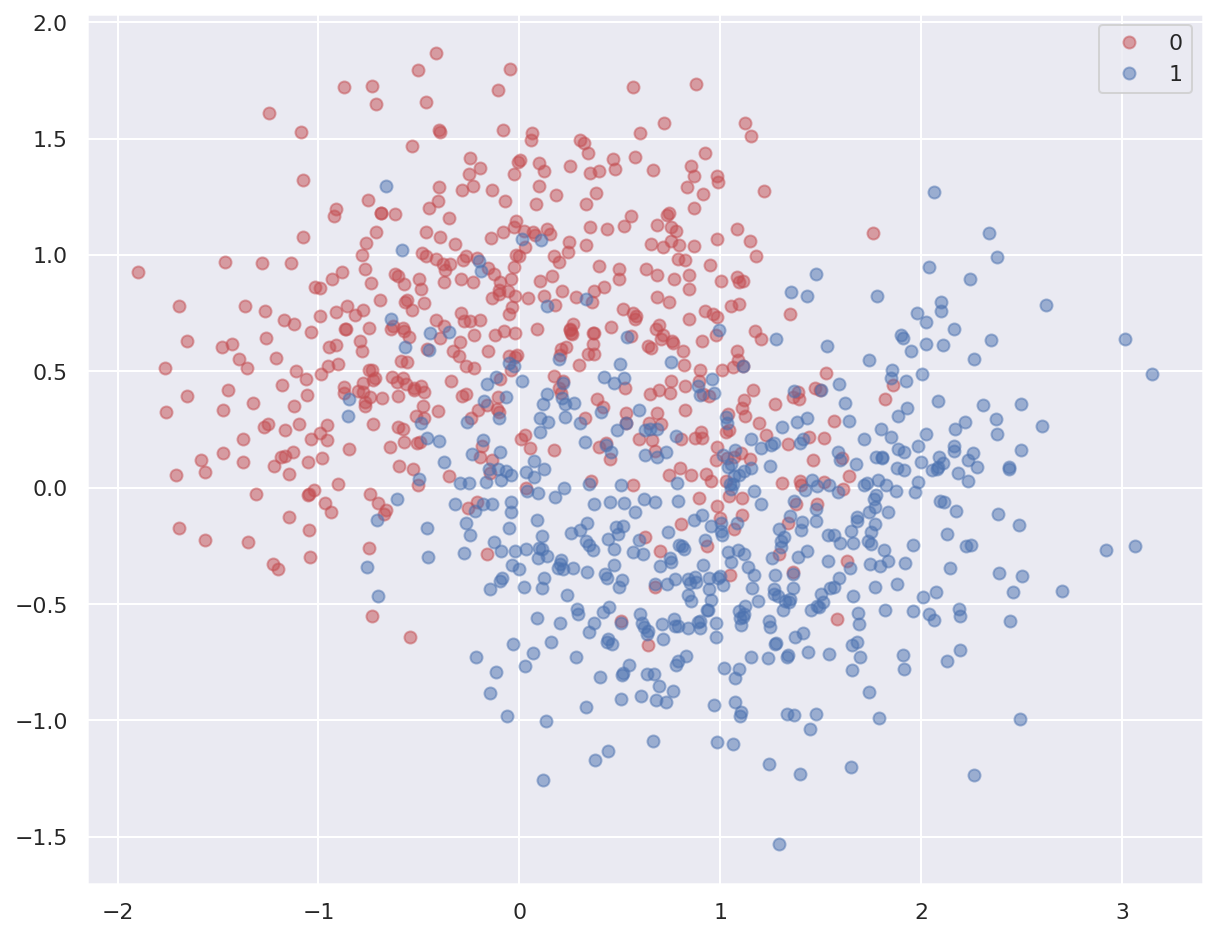

In [5]:
# Generate moon-shaped, noisy data
x, y = make_moons(n_samples=1000, noise=0.4)

plot_planar_data(x, y)

## Step 3: Training a classifier

### Question¶

Split data and labels into the `x_train`, `x_test`, `y_train` and `y_test` variables using a 25% ratio.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=15)

In [7]:
print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

assert x_train.shape == (750, 2)
assert y_train.shape == (750,)
assert x_test.shape == (250, 2)
assert y_test.shape == (250,)

x_train: (750, 2). y_train: (750,)
x_test: (250, 2). y_test: (250,)


### Question

Create a `DecisionTreeClassifier` instance and store it into the `dt_model` variable. Fit this model on the training data.

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
# Compute accuracy on training and test sets
train_acc = dt_model.score(x_train, y_train)
test_acc = dt_model.score(x_test, y_test)

print(f"Training accuracy: {train_acc * 100:.2f}%")
print(f"Test accuracy: {test_acc * 100:.2f}%")

assert train_acc > 0.95
assert test_acc > 0.74

Training accuracy: 100.00%
Test accuracy: 79.60%


In [10]:
# Plot the DT
dot_data = export_decision_tree(dt_model)
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

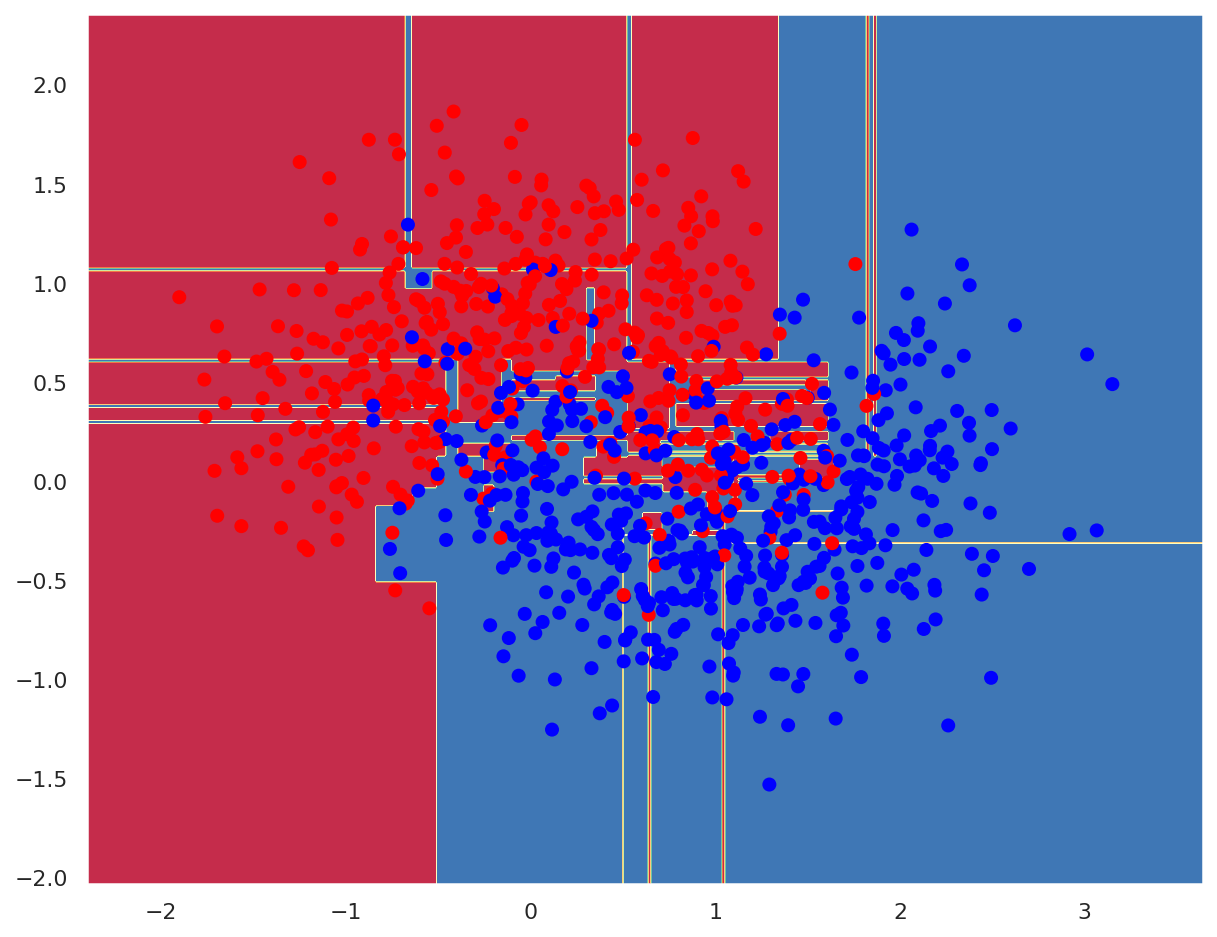

In [11]:
# Plot the decision boundary
plot_decision_boundary(lambda x: dt_model.predict(x), x, y)

## Step 4: Tuning the classifier

### Question

Search for the best values of `max_leaf_nodes` and `min_samples_split` through a `GridSearchCV` instance, stored in the `grid_search_cv` variable.

The final test accuracy should be above 84%.

In [41]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
param_grid = {
    'max_leaf_nodes': [1, 2, 3, 4, 5, 7, 8, 9, 10, 20, 50],
    'min_samples_split': [0, 1, 2, 3, 4, 5]
}

grid_search_cv = GridSearchCV(estimator, param_grid)

In [42]:
# Search for the best parameters with the specified classifier on training data
grid_search_cv.fit(x_train, y_train)

# Print the best combination of hyperparameters found
print(grid_search_cv.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

{'max_leaf_nodes': 7, 'min_samples_split': 2}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

In [43]:
# Compute accuracy on training and test sets
train_acc = grid_search_cv.score(x_train, y_train)
test_acc = grid_search_cv.score(x_test, y_test)

print(f"Training accuracy: {train_acc * 100:.2f}%")
print(f"Test accuracy: {test_acc * 100:.2f}%")

assert train_acc > 0.84
assert test_acc > 0.84

Training accuracy: 86.93%
Test accuracy: 82.40%


AssertionError: 

In [44]:
# Plot the best classifier
dot_data = export_decision_tree(grid_search_cv.best_estimator_)
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

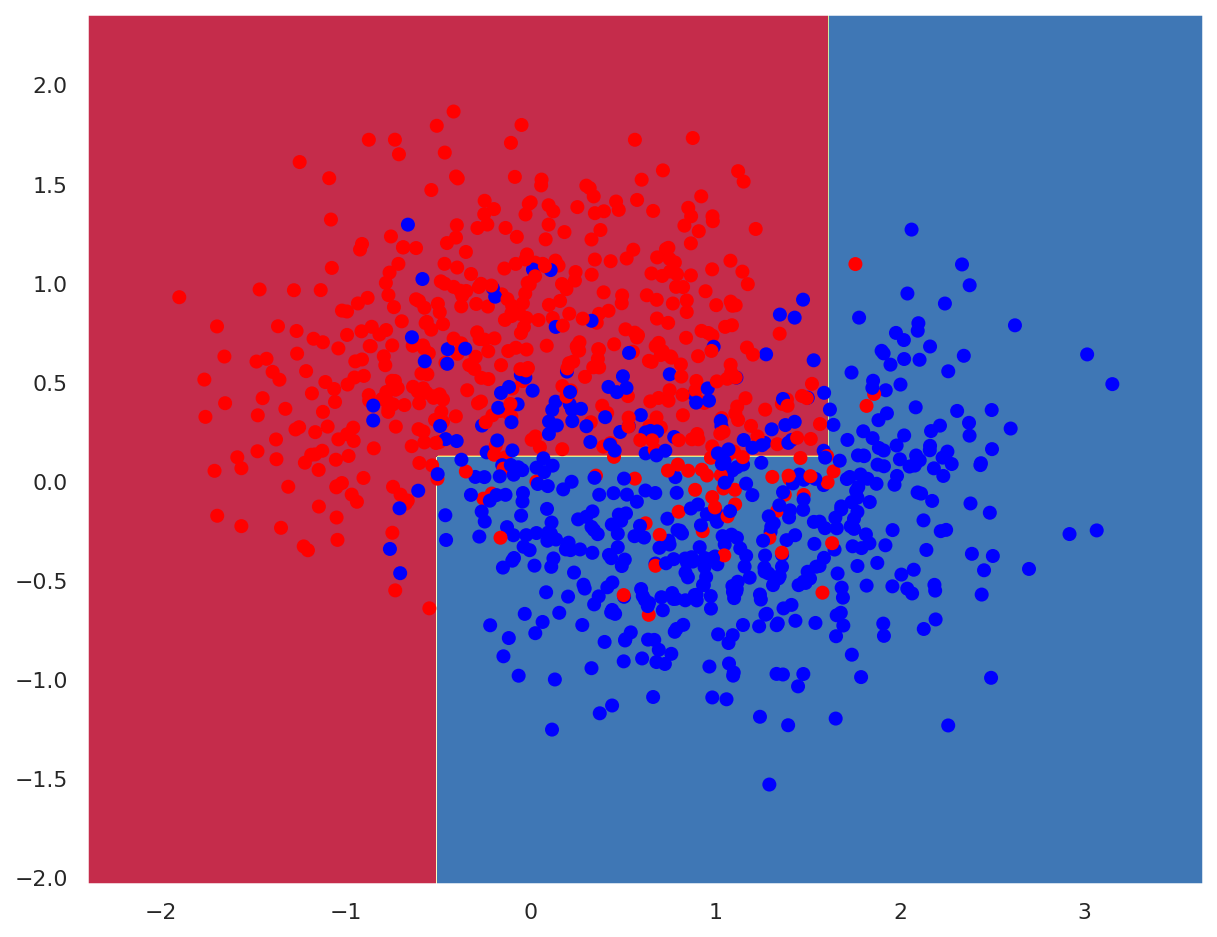

In [45]:
# Plot the decision boundary
plot_decision_boundary(lambda x: grid_search_cv.predict(x), x, y)

## TODO

- Try other metrics for grid search (f1, ROC AUC)